# Assignment: projs

**Few Important Things:**
 - Save this file as geo2_emailuser_attempt_assignment (e.g. geo2_mmann1123_attempt#_projs.ipynb)
 - Before submitting make sure to go to Cell > Run All and confirm there are no errors thrown.
 - If you can't figure something out, that is ok, do your best and share it


## Problem 1: Creating geopandas 
import geopandas as gpd 
from shapely.geometry import Polygons
### Part A: Points (2 Points)
Refer back to your previous assignments, create an geopandas dataframe called `square` that is a polygon with the followings coordinates `(0,45),(5,45),(5,40),(0,40)`, a column called `'name'` with all its values set to `'AOI'`, and the assigned projection of WGS 1984 Lat Lon (assign it using the `epsg:#` convention)


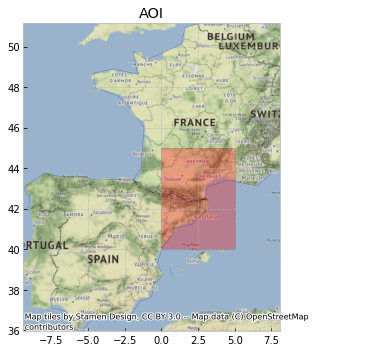

^The AOI we are creating^


In [51]:
# import required modules and functions
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString
import geopandas as gpd

def createPolyGpd(a_list_of_coord_pairs):
    """ Returns a geopandas GeoDataFrame object
    """
    
    a_poly= Polygon(a_list_of_coord_pairs)
    dict = {"name": ['AOI'],"geometry": [a_poly]}
    poly = gpd.GeoDataFrame(dict, geometry= "geometry", crs="EPSG:4326")
    #poly['name'] = 'AOI'
    
    return poly
square= createPolyGpd([(0,45),(5,45),(5,40),(0,40)])
square

#def createPolyGpd(a_list_of_coord_pairs):

    #coordinates = [(0,45),(5,45),(5,40),(0,40)]
    #square = gpd.GeoDataFrame(geometry=[Polygon(a_list_of_coord_pairs)])
    #square['name'] = 'AOI'

    #square.crs= 'EPSG: 4326'
# YOUR CODE HERE
#raise NotImplementedError()

    #return square


,name,geometry
0,AOI,"POLYGON ((0.00000 45.00000, 5.00000 45.00000, ..."


In [52]:
"""Run the following: you should get no errors"""
from geopandas import GeoDataFrame
from numpy import array

try:
    assert 'square' in globals() 
except AssertionError as e:
    raise AssertionError("The variable 'square' is not defined")

try:
    assert isinstance(square, GeoDataFrame) 
except AssertionError:
    raise AssertionError("square is not a geodataframe")

try:
    assert square.columns.tolist() == ['name','geometry']
except AssertionError:
    raise AssertionError("The column names should be 'name','geometry'")
    
try:
    assert square.loc[0,'name'] == 'AOI'
except AssertionError:
    raise AssertionError("The contents of the 'name' columns should be 'AOI'")


In [53]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

In [54]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

## Problem 2: Reprojections

### Part A: Assigning Projections (2 Points)
Knowing when to, and how to **assign**  projections (as opposed to 'reprojecting') is critical in our day to day GIS operations. Remember you should *assign* or "set" a projection only if the shapefile doesn't have one (or if it clearly has the wrong projection), and you should only assign a projection if your are 100% sure you know the right one. 

To do:
- Use the provided function `createNoCRS` below to create an object called `AOI` with the following coordinates `(0,45),(5,45),(5,40),(0,40)`
- Then assign the crs of WGS 1984 Lat Lon (using the EPSG convention) to the object `AOI`


In [55]:
def createNoCRS(a_list_of_coord_pairs):

    """ Returns a shapely Point object
    
    DO NOT EDIT THIS FUNCTION
    """
    # Create a Shapely polygon from the coordinate-tuple list
    point_coord = Polygon(a_list_of_coord_pairs)


    # create a dataframe with needed attributes and required geometry column
    df = {'geometry': [point_coord]}

    # Convert shapely object to a geodataframe 
    poly = gpd.GeoDataFrame(df, geometry='geometry')
    return poly

    


In [56]:
'''Create an object call AOI with no initial projection, then assign WSG lat lon CRS'''
# YOUR CODE HERE
#raise NotImplementedError()
coords = [(0,45),(5,45),(5,40),(0,40)]
AOI=createNoCRS(coords)
print(AOI)
#AOI.crs('EPSG: 1671')

                                            geometry
0  POLYGON ((0.00000 45.00000, 5.00000 45.00000, ...


In [57]:
coords= [(0,45),(5,45),(5,40),(0,40)]
AOI= createNoCRS(coords)
print(AOI)
AOI.set_crs('EPSG:4326', inplace = True)

                                            geometry
0  POLYGON ((0.00000 45.00000, 5.00000 45.00000, ...


,geometry
0,"POLYGON ((0.00000 45.00000, 5.00000 45.00000, ..."


In [58]:
"""Run the following tests: you should get no errors"""

try:
    assert AOI.crs.is_geographic
except AssertionError:
    raise AssertionError("Your crs doesn't seem to be assigned properly - it should be geographic lat/lon WGS84") 
try:
    assert AOI.geometry[0].bounds == (0.0, 40.0, 5.0, 45.0)
except AssertionError:
    raise AssertionError("The coordinates don't look right check again")


In [59]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

In [60]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

### Part B: Reproject AOI (2 points)
95% of your work will require you to reproject your data into a common crs. Remember, this MUST be done before you start analysis in python. It doesn't happen automatically here. 

For this part, let's just do a simple reprojection. Please reproject your `AOI` object created in Part A into a UTM projection **using the WGS 1984 spheriod**. You will need to look up which zone this is (for your data), and the EPSG code. It might be helpful to use [What UTM Zone Am I?](https://mangomap.com/robertyoung/maps/69585/what-utm-zone-am-i-in-)


In [61]:
# YOUR CODE HERE
#raise NotImplementedError()
AOI.to_crs('EPSG:32631', inplace = True )

In [62]:
"""Run the following tests: you should get no errors"""
# checking project using bound coordinates - cant show you the real test without giving away the answer
try:
    assert [round(i, 1) for i in AOI.bounds.values[0]] == [round(i, 1) for i in AOI.bounds.values[0]]
except AssertionError:
    raise AssertionError("Nice try, but that probably isn't the right EPSG code, this might be helpful https://mangomap.com/robertyoung/maps/69585/what-utm-zone-am-i-in-#")

In [63]:
"""Run the following hidden tests"""

'Run the following hidden tests'

### Part C: Thinking out loud (2 Points)
Refkecting on the projection, explain in words why `all(AOI.geometry == square.geometry)` is no longer equal, be specific about units of measure, and other relevant differences like changes in the prime meridian or origin etc:

**Put your answer in this markdown cell... don't delete it**. 

AOI is measured in degrees while square is ..
compare the differences in CRS reference vs coordinates without CRS

In [64]:
AOI.geometry

0    POLYGON ((263553.974 4987329.505, 657630.641 4...
Name: geometry, dtype: geometry

In [65]:
square.geometry

0    POLYGON ((0.00000 45.00000, 5.00000 45.00000, ...
Name: geometry, dtype: geometry

### Part D: Using Proj4 (2 points)
Now let's try using a **proj4 string** to do a reprojection instead of a EPSG code. Please reproject your `AOI` object into `NAD 1983 Lambert North America` from the [epsg.io](https://epsg.io).  

Make sure you use the DON'T USE the EPSG code, but the proj4 string instead. 

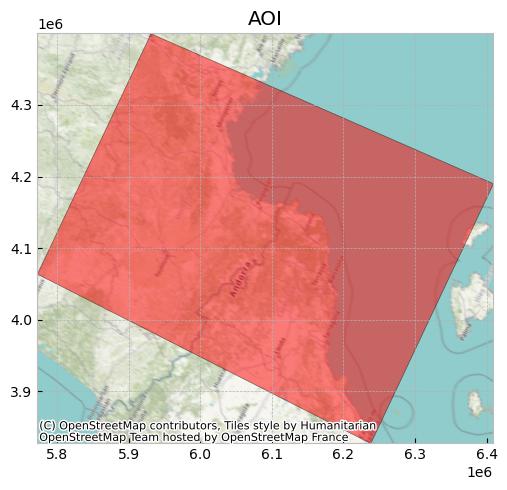

In [66]:
# YOUR CODE HERE
#raise NotImplementedError()
#AOI.to_crs('+proj=lcc +lon_0= +x_0=  +datum=NAD83 +units=us-ft', inplace= True)

AOI.to_crs('+proj=lcc +lat_1=20 lat_2=60 +lat_0=40 +lon_0=-96 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs +type=crs', inplace=True)
map_data([AOI], title='AOI', bounds_from=0)      


In [67]:
# """Run the following tests: you should get no errors"""
import warnings
warnings.filterwarnings("ignore")

try:
    assert 'lat_1=20' in AOI.crs.to_proj4()
except AssertionError:
    raise AssertionError("The projection string doesn't seem to be correct")

try:
    assert '+datum=NAD83' in AOI.crs.to_proj4()
except AssertionError:
    raise AssertionError("The projection string doesn't seem to be correct")


In [68]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

In [69]:
"""Run the following hidden tests: you should get no errors"""

'Run the following hidden tests: you should get no errors'

## Problem 3: Challenge Mapping

### Part A: Maping AOI (2 points)
Let's start with a simple exercises. Refering to our classwork (ie copying it), create a function for mapping our object `square` from part A. Limit the extent to the territorial boundaries of **both France & Spain** (including their territories for the moment). 

Steps:
- You will need to copy the `map_data` function from part A from our class lecture, and paste it here for use.
- Use you pandas syntax to isolate data for Spain and France from the `world` dataset imported below.
- Pass Spain and France to the `map_data` function to recreate the map below
- You can ignore difference in the base map.

Your map should look like:

<!-- ![AOI_map](./data/france_aoi.png) -->

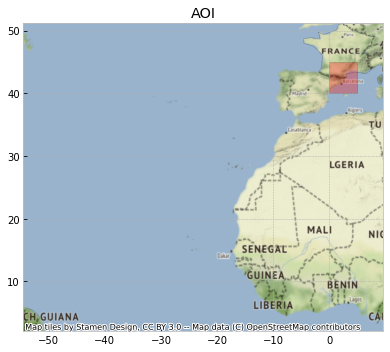

  

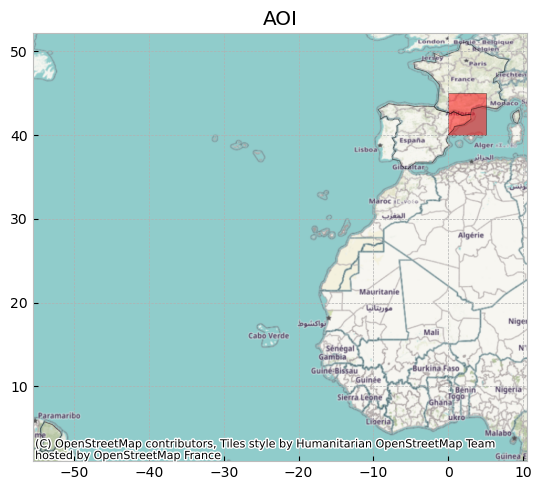

In [70]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


def map_data(data, title, bounds_from=0):
    #'''Function superimposes all the data on a map and sets a title for the map.'''    
    
    # Create subplots
    fig, ax = plt.subplots(figsize = (10, 5))
    
     #set extent of map from geometry bounds
 
    xlim = ([data[bounds_from].geometry.total_bounds[0]-1,  data[bounds_from].geometry.total_bounds[2]+1]) 
    ylim = ([data[bounds_from].geometry.total_bounds[1]-1,  data[bounds_from].geometry.total_bounds[3]+1])

    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    # Set colors
    fill_color = ["red", "None"]
    ctx.add_basemap(ax,crs=data[bounds_from].crs.to_string())
    # Iterate through list of data and colors to superimpose them onto map
    for i in range(0, len(data)):
        data[i].plot(facecolor = fill_color[i],edgecolor='black', alpha=0.5, ax = ax)
    # Add title
    plt.title(title)
    
    # Utilize BMH plotting style
    plt.style.use("bmh")
    #
    # Remove empty white space around the plot
    plt.tight_layout()
#world.head()
FranceSpain = world[(world['name'] == 'France') | (world['name'] ==  'Spain')]
# YOUR CODE HERE
#raise NotImplementedError()

map_data([square,FranceSpain], title="AOI", bounds_from=1)


Clearly that isn't ideal, keep in mind that France claims French Guinea in South America. How can we then set our extent? We could set it manually, but that is too much work. Instead we are going to look at how we can change the geometry of the `france` object. 

First let's look at `FranceSpain`. It has two objects, the first our French boundaries in a MULTIPOLYGON that includes the polygon for French Guinea. The second object, the POLYGON, is Spain. 

```python
> FranceSpain.geometry

43     MULTIPOLYGON (((-51.65780 4.15623, -52.24934 3...
132    POLYGON ((-7.45373 37.09779, -7.53711 37.42890...
Name: geometry, dtype: geometry
```

We are going to "explode" the multi part MULTIPOLYGON into a series of single part POLYGONS:

<!-- ![explode](./data/explode.png) -->

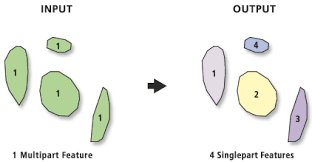

Figure 1: Exploding multipart geometry to single part

Let's take a look at what we get from exploding our geometry:

```python
> FS_explode = FranceSpain.explode(index_parts=True)
> FS_explode

 		pop_est 	continent 	name 	iso_a3 	gdp_md_est 	geometry
43   0 	67106161 	Europe 	France 	-99 	2699000.0 	POLYGON ((-51.65780 4.15623, -52.0, ...
     1 	67106161 	Europe 	France 	-99 	2699000.0 	POLYGON ((6.18632 49.46380, 6.6582, ...
     2 	67106161 	Europe 	France 	-99 	2699000.0 	POLYGON ((8.74601 42.62812, 9.3900, ...
132  0 	48958159 	Europe 	Spain 	ESP 	1690000.0 	POLYGON ((-7.45373 37.09779, -7.53, ...

```
Now seems like a good time to introduce multi-indexes. These are hierarchical indexes. On the far left in the data above, the first level indicates our two country codes (France=43, Spain=132). France has three parts associated with it each with an associated and each has a second-level index, here `0,1,2`. 

We can access the index using `.loc` as we have before. To get the first level values we can use 

``` python
> FS_explode.loc[43]
 	pop_est 	continent 	name 	iso_a3  gdp_md_est 	geometry
0 	67106161 	Europe 	France 	-99 	2699000.0 	POLYGON ((-51.65780 4.15623, -52.24, ...
1 	67106161 	Europe 	France 	-99 	2699000.0 	POLYGON ((6.18632 49.46380, 6.65823, ...
2 	67106161 	Europe 	France 	-99 	2699000.0 	POLYGON ((8.74601 42.62812, 9.39000, ...
```

To figure out which one of these is the main body of France we can look at the area. 

``` python
> FS_explode.loc[43].area
0     6.941855
1    64.627290
2     1.046521
dtype: float64
```
Looks like index 1 is the winner! We found france! We can access the second-level in a similar fashion;

``` python
> France = FS_explode.loc[43,1]
> France

continent                                                Europe
name                                                     France
...
geometry      POLYGON ((6.186320428094177 49.46380280211451,...
Name: (43, 1), dtype: object
```

Now we can replace our multipart geometry with a singlepart geometry:

``` python
> FranceSpain.loc[43,'geometry'] = FS_explode.loc[43,1].geometry
> FranceSpain

 	pop_est 	continent 	name 	iso_a3 	gdp_md_est 	geometry
43  67106161 	Europe 	France    -99 	 2699000.0 	POLYGON ((6.18632 49.46380, 6.65823, ...
132 48958159 	Europe 	Spain 	ESP  	1690000.0 	POLYGON ((-7.45373 37.09779, -7.53711,...
```

### Part B: Update Extent Map (1 point)
Using the steps outlined above please replace the France geometry to isolate the mainland of France itself. Then try creating the map from Part B. 

You map should look like:

<!-- ![exploded AOI](./data/france_aoi_update.png) -->

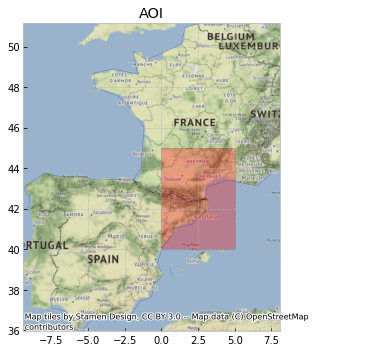

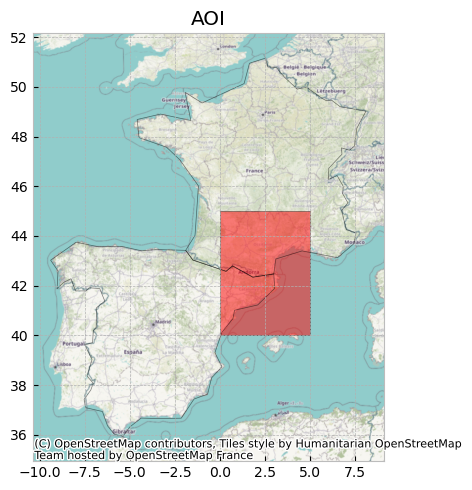

In [71]:
# YOUR CODE HERE
FS_explode = FranceSpain.explode(index_parts=True)
FS_explode
FS_explode.loc[43]
FS_explode.loc[43].area
France = FS_explode.loc[43,1]
France

FranceSpain.loc[43,'geometry'] = FS_explode.loc[43,1].geometry
FranceSpain
map_data([square,FranceSpain], title="AOI", bounds_from=1)


#raise NotImplementedError()


### Part C: Buffer Bounds Map (1 point)

Refering to our class work create a new function called `map_data_buffer` and use it to map our object `square`. Inside the function adjust your `xlim` and `ylim` values to zoom our map out enough to have *1 degree* of space on all sides of the map as follows:

<!-- ![bufferboundsmap.png](./data/bufferboundsmap.png) -->

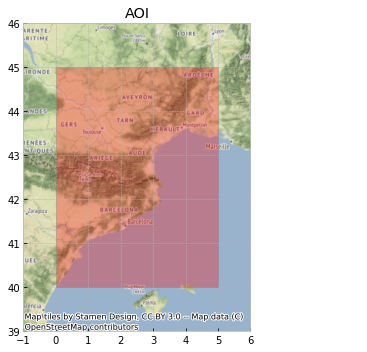

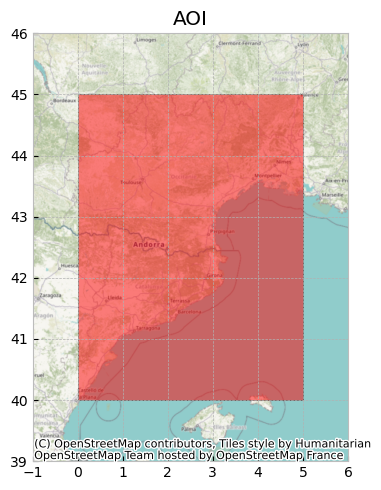

In [72]:
# YOUR CODE HERE
def map_data_buffer(data, title, bounds_from=0):
    fig, ax = plt.subplots(figsize = (10, 5))
    
     #set extent of map from geometry bounds
 
    xlim = ([data[bounds_from].geometry.total_bounds[0]-1,  data[bounds_from].geometry.total_bounds[2]+1]) 
    ylim = ([data[bounds_from].geometry.total_bounds[1]-1,  data[bounds_from].geometry.total_bounds[3]+1])

    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

    fill_color = ["red", "None"]
    ctx.add_basemap(ax,crs=data[bounds_from].crs.to_string())
    # Iterate through list of data and colors to superimpose them onto map
    for i in range(0, len(data)):
        data[i].plot(facecolor = fill_color[i],edgecolor='black', alpha=0.5, ax = ax)
    # Add title
    plt.title(title)
    
    # Utilize BMH plotting style
    plt.style.use("bmh")
    #
    # Remove empty white space around the plot
    plt.tight_layout()


    #'''Function superimposes all the data on a map and sets a title for the map.'''    
    
    # Create subplots
    

#raise NotImplementedError()

    
map_data_buffer([square], title="AOI")

## Problem 4

## Part A (2 points)

Using examples from the this help page [https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html](https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html) 

Create a geodataframe called `gdf` with the following properties:
- Has WGS 1984 lat lon projection
- Has a point overy 40 degrees of latitude
- In two vertical rows, one at 0 degrees longitude and the other at 10 degrees longitude
    
Your ouput when plotted with `map_data_buffer` or `map_data` should look like:

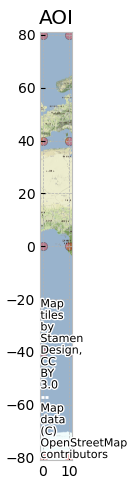

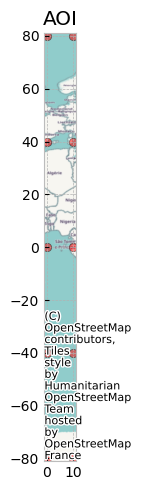

In [73]:

import pandas as pd
import geopandas
df = pd.DataFrame(
    { "Latitude": [80, 40, 0, -40, -80, 80, 40, 0, -40, -80] ,
        "Longitude":[0, 0, 0, 0, 0, 10, 10, 10, 10, 10] })
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326")

map_data_buffer([gdf], title= 'AOI')

# YOUR CODE HERE
#raise NotImplementedError()



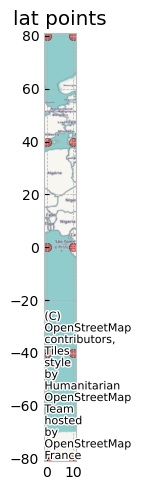

In [74]:
# try to plot things out
try:
    # do this if it doesn't throw an error
    map_data_buffer([gdf], title="lat points")
except:    
    # otherwise do this
    map_data([gdf], title="lat points")

In [75]:
'''Run the following tests: you should get no errors'''
try:
    assert 'gdf' in globals()
except AssertionError:
    raise AssertionError("The output should be assigned to a variable called 'gdf'")
try:
    assert isinstance(gdf, gpd.GeoDataFrame)
except AssertionError:
    raise AssertionError("The output should be a GeoDataFrame")
try:
    assert gdf.crs.to_epsg() == 4326
except AssertionError:
    raise AssertionError("The crs should be set to 4326")
try:
    assert all([ i.geom_type == 'Point' for i in gdf.geometry])
except AssertionError:
    raise AssertionError("All geometries should be points")
try:
    assert gdf.total_bounds.tolist() == [0.0, -80.0, 10.0, 80.0]
except AssertionError:
    raise AssertionError("The coordinates of the box are not set properly")
try:
    assert len(gdf) == 10
except AssertionError:
    raise AssertionError("You should have 10 evenly spaced points")


In [76]:
'''Hidden tests'''

'Hidden tests'

In [77]:
'''Hidden tests'''


'Hidden tests'

### Part B (1 point)

Complete the following:
- Create a variable `gdf_buffer` containing 5 degree buffers around each of the points in `gdf`. 
- Then create a variable called `gdf_area` that holds the area value for each buffer in `gdf_buffer`

In [79]:
# YOUR CODE HERE
gdf_buffer= gdf.buffer(5)

gdf_area= gdf_buffer.area


#raise NotImplementedError()


area in degrees: 
 0    78.413712
1    78.413712
2    78.413712
3    78.413712
4    78.413712
5    78.413712
6    78.413712
7    78.413712
8    78.413712
9    78.413712
dtype: float64


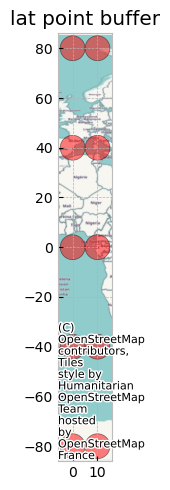

In [81]:
# check areas for each point
print('area in degrees: \n',gdf_area)
# check output
try:
    # do this if it doesn't throw an error
    map_data_buffer([gdf_buffer], title="lat point buffer")
except:    
    # otherwise do this
    map_data([gdf_buffer], title="lat points buffer")

In [82]:
'''Run the following tests: you should get no errors'''
try:
    assert 'gdf_buffer' in globals()
except AssertionError:
    raise AssertionError("The output should be assigned to a variable called 'gdf_buffer'")
try:
    assert isinstance(gdf_buffer, gpd.geoseries.GeoSeries)
except AssertionError:
    raise AssertionError("The output should be a GeoSeries")
try:
    assert 'gdf_area' in globals()
except AssertionError:
    raise AssertionError("The output should be assigned to a variable called 'gdf_area'")

try:
    assert list(gdf_area.round(3)) == [78.414,78.414,78.414, 78.414, 78.414, 78.414, 78.414, 78.414, 78.414, 78.414]
except AssertionError:
    raise AssertionError("Check that your buffers are each 5 degrees, check the geopandas help for buffer()")

In [ ]:
'''Hidden tests'''

### Part C (2 point)

In this part do the following, create a new variable `gdf_buffer_mollweide` which holds:
- `gdf_buffer` but reprojected to [https://epsg.io/54009](https://epsg.io/54009)

Note: Not all projections have a `EPSG` code, you may have to use proj4 or another authority (`EPSG` vs `ESRI`)

In [83]:
# YOUR CODE HERE
gdf_buffer_mollweide =gdf_buffer.to_crs('ESRI:54009')
#raise NotImplementedError()


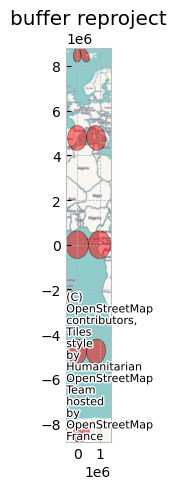

In [84]:
# check output
try:
    # do this if it doesn't throw an error
    map_data_buffer([gdf_buffer_mollweide], title="buffer reproject")
except:    
    # otherwise do this
    map_data([gdf_buffer_mollweide], title="buffer reproject")

In [85]:
print('area in km2: \n', gdf_buffer_mollweide.area/10000000)

area in km2: 
 0    16856.248919
1    74365.972218
2    97078.029496
3    74365.972218
4    16856.248919
5    16856.248919
6    74365.972218
7    97078.029496
8    74365.972218
9    16856.248919
dtype: float64


In [86]:
'''Hidden tests'''


'Hidden tests'

### Part D (2 points)

Reflecting on the plot above, explain why the areas is the northern and southern regions shrank in size when we reproejcted from lat/lon and into Mollweide

Be explicit, read about it if you need to. 

Your Response here:




### Part E (2 points)

Look up the Mollweide projection, and answer the following multiple choice question. Set the variable `answer` to the letter of the correct answer e.g. `'A'` or `'B'` etc.

Which of the following properties make the Mollweide projection idea for this task:

`'A'` - It is an equal area projection

`'B'` - it is a homolographic projection

`'C'` - it is a pseudocylindrical projection

`'D'` - it is has parrallels near the poles 

`'E'` - it maintains shapes





In [91]:
# YOUR CODE HERE
answer= 'A' 
#raise NotImplementedError()

In [92]:
'''The following tests should pass without any errors'''

try:
    assert 'answer' in globals()
except AssertionError:
    raise AssertionError("The output should be assigned to a variable called 'answer'")
try:
    assert answer  in ['A','B','C','D']
except AssertionError:
    raise AssertionError("The answer must be one of the multiple choice options 'A','B','C',or 'D' ")


In [93]:
'''Hidden tests'''

'Hidden tests'